In [17]:
import pickle as pkl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import _pickle as cPickle
import ast
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter, MaxNLocator
from tqdm import tqdm
import random as rnd
%matplotlib inline
from IPython.display import Image
import collections
import numpy as np

In [8]:
results_dir = "/Users/MeryemMhamdi/GoogleDriveEPFL/Gdrive Thesis/4 Results/"

In [10]:
results_dir1 = "/Users/MeryemMhamdi/GoogleDriveEPFL/Gdrive Thesis/4 Results/Others/RCV_processed/"

In [5]:
impl_dir = "/Users/MeryemMhamdi/GoogleDriveEPFL/Gdrive Thesis/3 Algorithms Implementation/MultiEmb_EventDet_Thesis/"

# Cross Language Document Classification Benchmark:

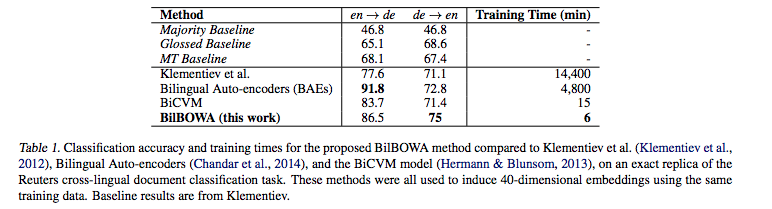

In [142]:
Image(filename=impl_dir+'CLDCEval/Plots/BilBOWA Fast Bilingual Distributed Representations Results.png') 

# I. Architecture of the Classification Model used:

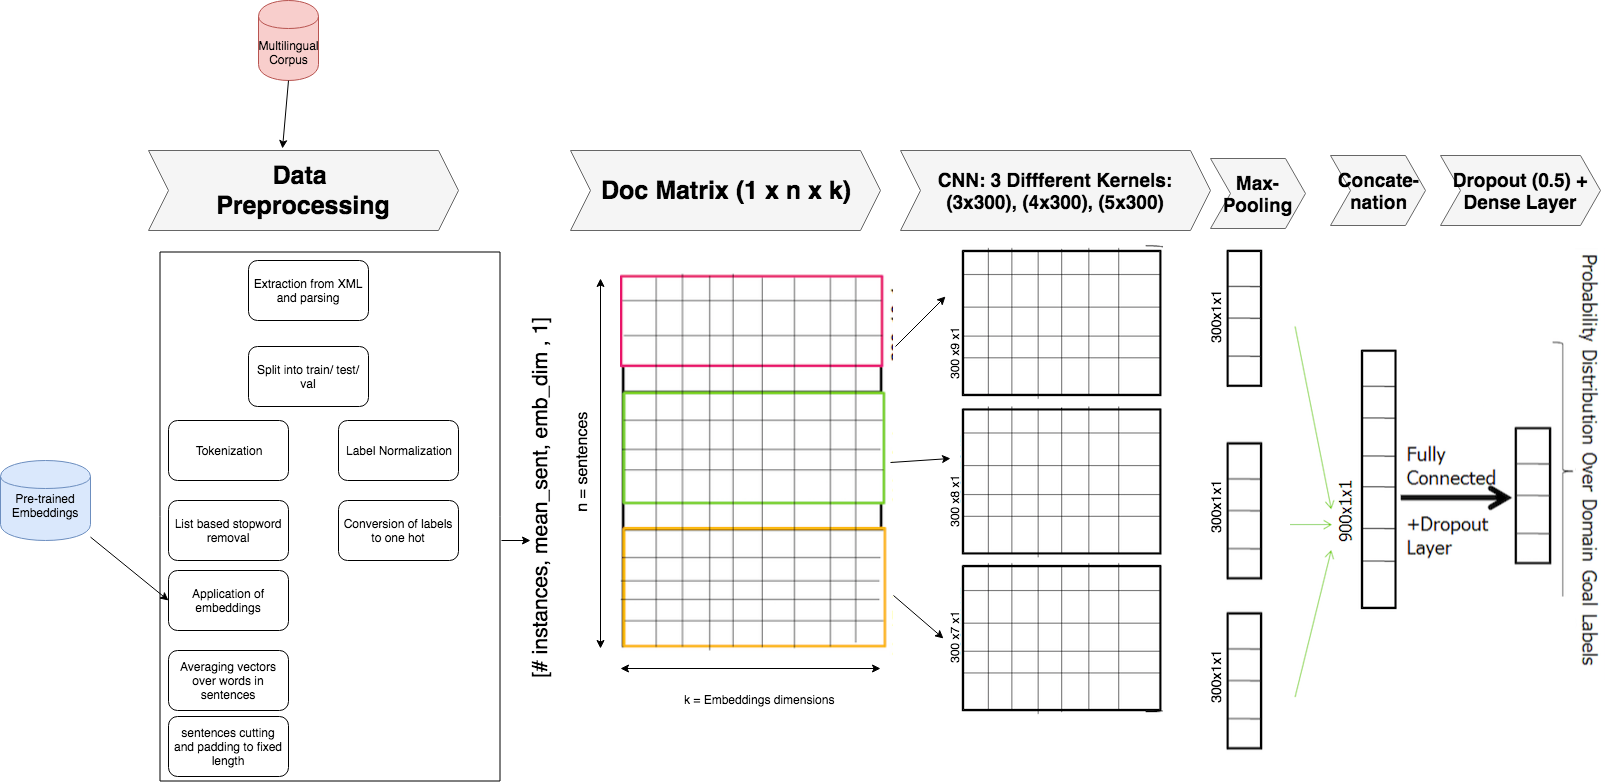

In [141]:
Image(filename=impl_dir+'CLDCEval/Plots/CNNArchictecture.png') 

# II. Embeddings:

### MultiSkip: 
An extension of Bi-Skip gram in Bilingual Word Representations Monolingual Quality Mind Results (Luong et al. 2015) 74 citations

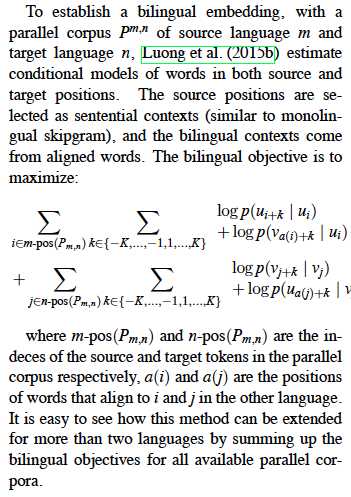

In [145]:
Image(filename=impl_dir+'CLDCEval/Plots/multiSkip.png') 

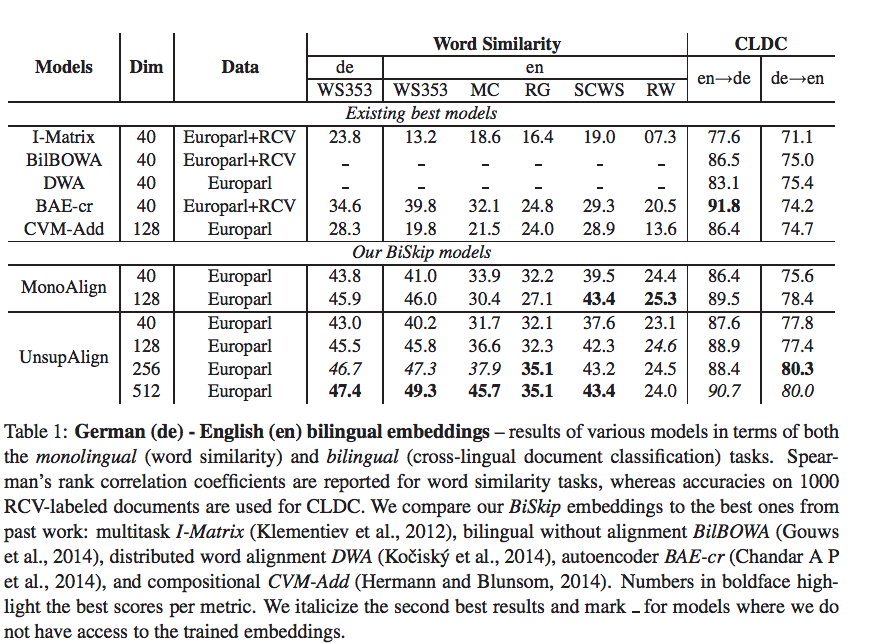

In [146]:
Image(filename=impl_dir+'CLDCEval/Plots/Luong Bilingual Word Representations Monolingual Quality Mind Results.png') 

# III. Analysis of model trained and evaluated on DW:
After keeping only common labels

In [83]:
model_dataset = "CNNModels_DW"
results_path = results_dir + model_dataset +"/en_multiSkip_40_normalized_results.p"

In [84]:
with open(results_path,"rb") as results_file:
    dict_= cPickle.load(results_file, encoding='latin1')

## 1. Statistics of the Dataset:

In [85]:
print("Number of Training Instances in English:", len(dict_['y_train_trg'][0]))
print("Number of Validation Instances in English:", len(dict_['y_dev_trg'][0]))
print("Number of Testing Instances in English:", len(dict_['y_test_trg_en'][0]))
print("Number of Testing Instances in German:", len(dict_['y_test_trg_de'][0]))
print("Number of distinct English labels after discarding non-shared labels btw EN and DE:", len(set(dict_['y_test_trg_en'][0])))

Number of Training Instances in English: 90266
Number of Validation Instances in English: 11275
Number of Testing Instances in English: 11275
Number of Testing Instances in German: 13265
Number of distinct English labels after discarding non-shared labels btw EN and DE: 169


In [18]:
with open(results_dir1 + "en_documents_lengths.p", "rb") as file:
    lengths_en = cPickle.load(file, encoding='latin1')

with open(results_dir1 + "de_documents_lengths.p", "rb") as file:
    lengths_de = cPickle.load(file, encoding='latin1')
    
with open(results_dir1 + "it_documents_lengths.p", "rb") as file:
    lengths_it = cPickle.load(file, encoding='latin1')
    
with open(results_dir1 + "fr_documents_lengths.p", "rb") as file:
    lengths_fr = cPickle.load(file, encoding='latin1')

In [22]:
print("English=",np.mean(lengths_en), np.max(lengths_en))
print("German=",np.mean(lengths_de), np.max(lengths_de))
print("French=",np.mean(lengths_fr), np.max(lengths_fr))
print("Italian=",np.mean(lengths_it), np.max(lengths_it))

English= 242.80880055 9923
German= 188.408026798 7655
French= 236.332968803 4687
Italian= 121.632723907 1370


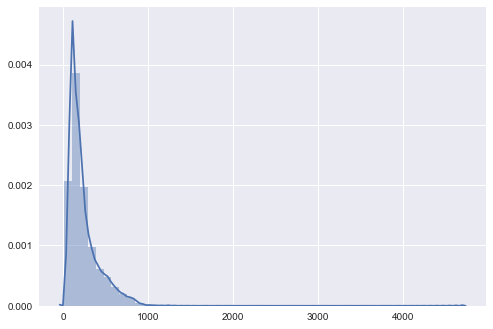

In [47]:
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(lengths_fr);

In [58]:
import collections
data = lengths_en + lengths_de + lengths_fr + lengths_it
counts = collections.Counter(data)
sorted(counts)
#new_list = sorted(lengths_en, key=lambda x: -counts[x])
#new_list
from collections import defaultdict

def leaders(xs, top=600):
    counts = defaultdict(int)
    for x in xs:
        counts[x] += 1
    return sorted(counts.items(), reverse=True, key=lambda tup: tup[1])[:top]

def perce_leaders(tuples_list):
    total = 0
    max_ = 0
    for pair_ in tuples_list:
        total += pair_[1]
        if pair_[0] > max_:
            max_ = pair_[0]
    return max_, total/len(data)
perce_leaders(leaders(data))

(626, 0.9558291577091135)

In [61]:
counts[0]

4

In [ ]:
with open("/Users/MeryemMhamdi/GoogleDriveEPFL/Gdrive Thesis/4 Results/Others/RCV_processed/rcv1/processed/train/X_train_processed_english.p","rb") as file:
    x_process = cPickle.load(file)

In [ ]:
x_process

In [59]:
leaders(data)

[(92, 4654),
 (94, 4397),
 (95, 4304),
 (87, 4297),
 (85, 4269),
 (91, 4218),
 (84, 4188),
 (86, 4187),
 (101, 4173),
 (99, 4171),
 (88, 4166),
 (100, 4135),
 (90, 4122),
 (89, 4098),
 (93, 4098),
 (98, 4096),
 (103, 4095),
 (83, 4077),
 (96, 4074),
 (77, 4039),
 (104, 4032),
 (63, 4011),
 (60, 4006),
 (70, 3994),
 (97, 3978),
 (74, 3977),
 (59, 3966),
 (81, 3940),
 (102, 3929),
 (57, 3926),
 (75, 3920),
 (78, 3914),
 (105, 3912),
 (72, 3908),
 (107, 3897),
 (61, 3889),
 (111, 3871),
 (82, 3869),
 (62, 3856),
 (79, 3836),
 (76, 3827),
 (106, 3823),
 (64, 3817),
 (108, 3790),
 (73, 3788),
 (71, 3788),
 (109, 3775),
 (80, 3775),
 (58, 3746),
 (113, 3701),
 (112, 3694),
 (65, 3690),
 (110, 3670),
 (114, 3623),
 (66, 3596),
 (69, 3549),
 (68, 3547),
 (115, 3521),
 (116, 3519),
 (67, 3493),
 (117, 3444),
 (56, 3441),
 (123, 3418),
 (118, 3312),
 (130, 3290),
 (121, 3277),
 (54, 3272),
 (125, 3231),
 (119, 3220),
 (55, 3195),
 (122, 3190),
 (120, 3190),
 (142, 3128),
 (128, 3120),
 (133, 310

In [23]:
hist,bins=np.histogram(lengths_en,bins=np.linspace(0,60,7))
print(hist)

[   66  4404 11865 14810 18526 32684]


## 2. Analysis of Results:

### Accuracy Curves:

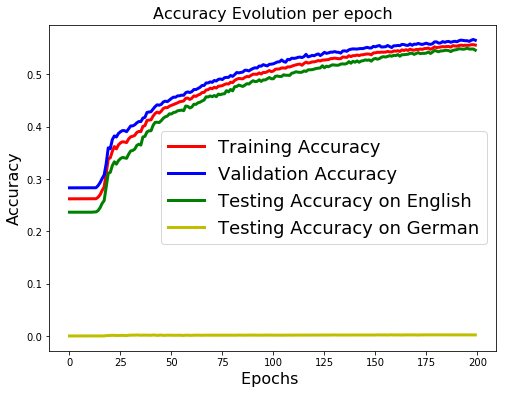

In [86]:
plt.figure(figsize=[8,6])
plt.plot(dict_['train_accs'],'r',linewidth=3.0)
plt.plot(dict_['val_accs'],'b',linewidth=3.0)
plt.plot(dict_['test_accs_en'],'g',linewidth=3.0)
plt.plot(dict_['test_accs_de'],'y',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy', 'Testing Accuracy on English', 'Testing Accuracy on German'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Evolution per epoch',fontsize=16)

### Confusion Matrix:

#### Reading class names from label vocabulary file

In [87]:
labels_file_path = impl_dir + "/dataModule/DataLabelsVocab/dw_labels_en_translated_de.txt"
class_names = []
with open(labels_file_path, "r") as label_txt:
    for line in label_txt:
        class_names.append(line)

In [88]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cnf_matrix = confusion_matrix(list(dict_['y_train_pred'][100]),list(dict_['y_train_trg'][100]))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

In [ ]:
class_names = elements.keys()

cnf_matrix = confusion_matrix(dict_['y_train_trg'],dict_['y_train_pred'])

np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.savefig("Confusion Matrix")
plt.show()

# IV. Analysis of model trained and evaluated on RCV:

In [4]:
data_dir = "/Users/MeryemMhamdi/GoogleDriveEPFL/Gdrive Thesis/4 Results/RCV_processed/"
rcv1 = "rcv1/processed/"

## Results Analysis:

### a. Model using German Monolingual Embeddings trained and evaluated on German:

In [5]:
model_dataset = "CNNModels_RCV/german_mono/"
results_path = results_dir + model_dataset +"german_mono_results.p"
model_path = results_dir + model_dataset +"german_mono_cnn_keras_model.h5"

In [6]:
with open(results_path,"rb") as results_file:
    dict_= cPickle.load(results_file, encoding='latin1')

In [ ]:
# Loss Curves
"""
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
"""

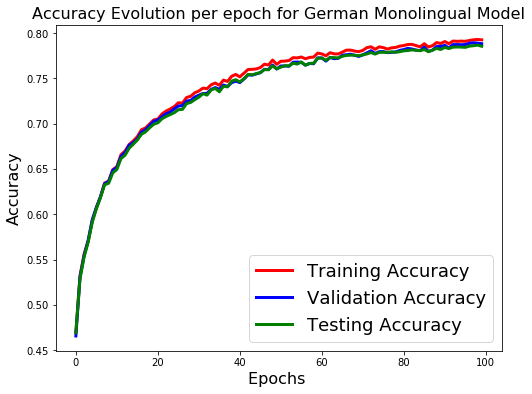

In [94]:
# Accuracy Curves 
plt.figure(figsize=[8,6])
plt.plot(dict_['train_accs'],'r',linewidth=3.0)
plt.plot(dict_['val_accs'],'b',linewidth=3.0)
plt.plot(dict_['test_accs'],'g',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy', 'Testing Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Evolution per epoch for German Monolingual Model',fontsize=16)

### Confusion Matrices:

In [99]:
labels_file_path = data_dir + "label_vocab.p"
with open(labels_file_path, "rb") as pkl_file:
    class_names_dict = pkl.load(pkl_file)

In [100]:
class_names =  class_names_dict.keys()

In [101]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### On Train:

Confusion matrix, without normalization
[[  472    66    48    47]
 [ 1941  6106  1281   839]
 [ 1241  2919 20924   361]
 [  716   854   237 12769]]


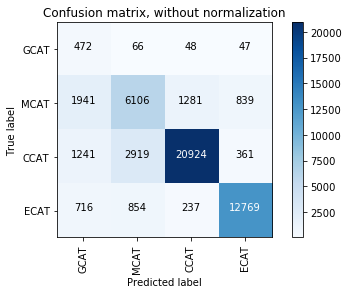

In [102]:
cnf_matrix = confusion_matrix(list(dict_['y_train_pred'][99]),list(dict_['y_train_trg'][99]))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

Normalized confusion matrix
[[ 0.75  0.1   0.08  0.07]
 [ 0.19  0.6   0.13  0.08]
 [ 0.05  0.11  0.82  0.01]
 [ 0.05  0.06  0.02  0.88]]


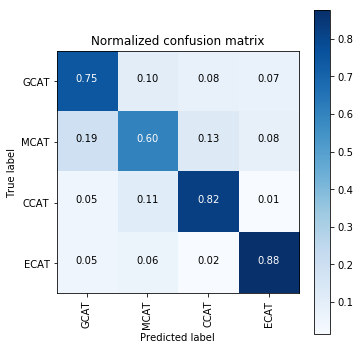

In [103]:
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.savefig("Confusion Matrix")
plt.show()

## On Test:

Confusion matrix, without normalization
[[ 148   15   15   19]
 [ 688 1897  408  279]
 [ 388  951 6581  120]
 [ 217  240   70 3846]]


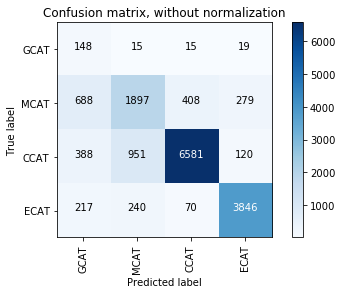

In [109]:
cnf_matrix = confusion_matrix(list(dict_['y_test_pred'][99]),list(dict_['y_test_trg'][99]))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

Normalized confusion matrix
[[ 0.75  0.08  0.08  0.1 ]
 [ 0.21  0.58  0.12  0.09]
 [ 0.05  0.12  0.82  0.01]
 [ 0.05  0.05  0.02  0.88]]


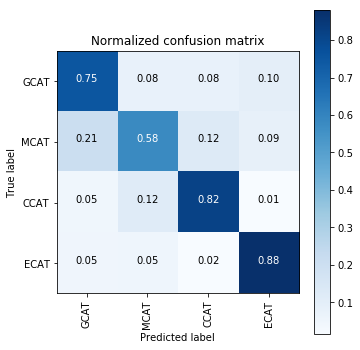

In [110]:
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.savefig("Confusion Matrix")
plt.show()

### b. Model using Multilingual Embeddings (MultiSkipGram) trained on English and evaluated on English and German:

In [8]:
model_dataset = "CNNModels_RCV/english_train_multi/"
results_path = results_dir + model_dataset +"en_multiSkip_40_normalized_results.p"
model_path = results_dir + model_dataset +"en_multiSkip_40_normalized_cnn_keras_model.h5"

In [9]:
with open(results_path,"rb") as results_file:
    dict_= cPickle.load(results_file, encoding='latin1')

In [10]:
dict_.keys()

dict_keys(['test_recalls_en', 'test_accs_en', 'train_precisions', 'val_f1s', 'test_precisions_de', 'y_dev_pred', 'y_test_pred_de', 'test_f1s_en', 'val_preds', 'y_test_trg_en', 'y_train_pred', 'val_recalls', 'y_dev_trg', 'train_recalls', 'test_accs_de', 'test_precisions_en', 'train_accs', 'train_f1s', 'val_accs', 'test_f1s_de', 'y_test_pred_en', 'y_train_trg', 'test_recalls_de', 'y_test_trg_de'])

In [11]:
print("Number of Training Instances in English:", len(dict_['y_train_trg'][0]))
print("Number of Validation Instances in English:", len(dict_['y_dev_trg'][0]))
print("Number of Testing Instances in English:", len(dict_['y_test_trg_en'][0]))
print("Number of Testing Instances in German:", len(dict_['y_test_trg_de'][0]))
print("Number of distinct English labels after discarding non-shared labels btw EN and DE:", len(set(dict_['y_test_trg_en'][0])))

Number of Training Instances in English: 514832
Number of Validation Instances in English: 128709
Number of Testing Instances in English: 160886
Number of Testing Instances in German: 15882
Number of distinct English labels after discarding non-shared labels btw EN and DE: 4


### Distribution of different classes:

In [38]:
counter=collections.Counter(dict_['y_train_trg'][99])
print(counter)

Counter({0: 244072, 3: 107299, 2: 105054, 1: 58407})


In [36]:
counter=collections.Counter(dict_['y_test_trg_en'][99])
print(counter)

Counter({0: 76263, 3: 33468, 2: 32744, 1: 18411})


In [37]:
counter=collections.Counter(dict_['y_dev_trg'][99])
print(counter)

Counter({0: 60993, 3: 26872, 2: 26263, 1: 14581})


In [39]:
counter=collections.Counter(dict_['y_test_trg_de'][99])
print(counter)

Counter({2: 7074, 3: 4264, 1: 3103, 0: 1441})


In [40]:
counter=collections.Counter(dict_['y_test_pred_de'][99])
print(counter)

Counter({0: 14141, 2: 1197, 1: 287, 3: 257})


In [49]:
f1_score(dict_['y_test_trg_de'][99],dict_['y_test_pred_de'][99],average='micro')

0.15917390756831634

### Accuracy Curves:

In [150]:
print("Training accuracy epoch 100= ",dict_['train_accs'][99])
print("Validation accuracy epoch 100= ",dict_['val_accs'][99])
print("English Testing accuracy epoch 100= ",dict_['test_accs_en'][99])
print("German Testing accuracy epoch 100= ",dict_['test_accs_de'][99])

Training accuracy epoch 100=  0.892151226031
Validation accuracy epoch 100=  0.889603679618
English Testing accuracy epoch 100=  0.889306714071
German Testing accuracy epoch 100=  0.159173907568


In [151]:
print("Training accuracy epoch 40= ",dict_['train_accs'][39])
print("Validation accuracy epoch 40= ",dict_['val_accs'][39])
print("English Testing accuracy epoch 40= ",dict_['test_accs_en'][39])
print("German Testing accuracy epoch 40= ",dict_['test_accs_de'][39])

Training accuracy epoch 40=  0.870594679429
Validation accuracy epoch 40=  0.868882517928
English Testing accuracy epoch 40=  0.869665477419
German Testing accuracy epoch 40=  0.186878226924


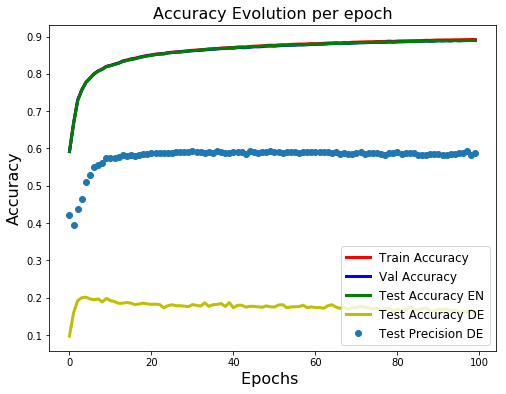

In [152]:
# Accuracy Curves 
plt.figure(figsize=[8,6])
plt.plot(dict_['train_accs'],'r',linewidth=3.0)
plt.plot(dict_['val_accs'],'b',linewidth=3.0)
plt.plot(dict_['test_accs_en'],'g',linewidth=3.0)
plt.plot(dict_['test_accs_de'],'y',linewidth=3.0)
plt.plot(dict_['test_precisions_de'],'o',linewidth=3.0)
plt.legend(['Train Accuracy', 'Val Accuracy',
            'Test Accuracy EN', 'Test Accuracy DE',
            'Test Precision DE'],fontsize=12, loc =4)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Evolution per epoch',fontsize=16)

### Confusion Matrix for English Test:

Confusion matrix, without normalization
[[70922  2973  1913  3013]
 [ 1323 12612   634   798]
 [ 1735  1322 30010   124]
 [ 2283  1504   187 29533]]


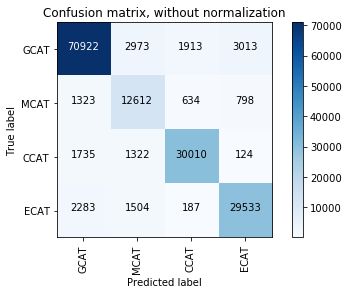

In [153]:
cnf_matrix = confusion_matrix(list(dict_['y_test_pred_en'][99]),list(dict_['y_test_trg_en'][99]))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

Normalized confusion matrix
[[ 0.9   0.04  0.02  0.04]
 [ 0.09  0.82  0.04  0.05]
 [ 0.05  0.04  0.9   0.  ]
 [ 0.07  0.04  0.01  0.88]]


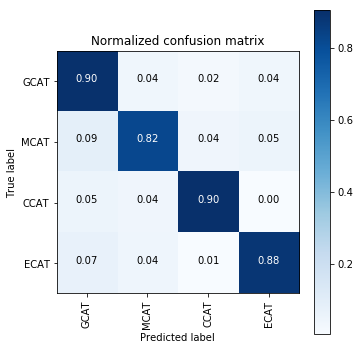

In [154]:
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.savefig("Confusion Matrix")
plt.show()

### Confusion Matrix for German Test:

Confusion matrix, without normalization
[[1257 2753 6207 3924]
 [  65  181   11   30]
 [ 112  155  855   75]
 [   7   14    1  235]]


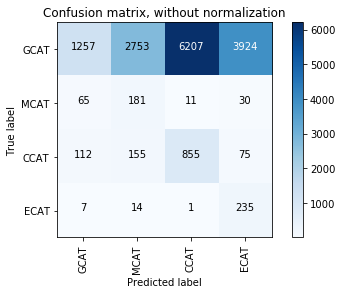

In [155]:
cnf_matrix = confusion_matrix(list(dict_['y_test_pred_de'][99]),list(dict_['y_test_trg_de'][99]))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

In [ ]:
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.savefig("Confusion Matrix")
plt.show()

### c. Model using Multilingual Embeddings (MultiSkipGram) trained on English and German and evaluated on English and German:

In [130]:
model_dataset = "CNNModels_RCV/all_train_multi/"
results_path = results_dir + model_dataset +"all_multiSkip_40_normalized_results.p"
model_path = results_dir + model_dataset +"all_multiSkip_40_normalized_cnn_keras_model.h5"

In [131]:
with open(results_path,"rb") as results_file:
    dict_= cPickle.load(results_file, encoding='latin1')

In [132]:
print("Number of Training Instances in English and German:", len(dict_['y_train_trg'][0]))
print("Number of Validation Instances in English and German:", len(dict_['y_dev_trg'][0]))
print("Number of Testing Instances in English:", len(dict_['y_test_trg_en'][0]))
print("Number of Testing Instances in German:", len(dict_['y_test_trg_de'][0]))
print("Number of distinct English labels after discarding non-shared labels btw EN and DE:", len(set(dict_['y_test_trg_en'][0])))

Number of Training Instances in English and German: 565653
Number of Validation Instances in English and German: 141415
Number of Testing Instances in English: 160886
Number of Testing Instances in German: 15882
Number of distinct English labels after discarding non-shared labels btw EN and DE: 4


### Accuracy Curves:

In [134]:
print("Training accuracy epoch 40= ",dict_['train_accs'][39])
print("Validation accuracy epoch 40= ",dict_['val_accs'][39])
print("English Testing accuracy epoch 40= ",dict_['test_accs_en'][39])
print("German Testing accuracy epoch 40= ",dict_['test_accs_de'][39])

Training accuracy epoch 40=  0.862914189441
Validation accuracy epoch 40=  0.861443269809
English Testing accuracy epoch 40=  0.869217955571
German Testing accuracy epoch 40=  0.782143306888


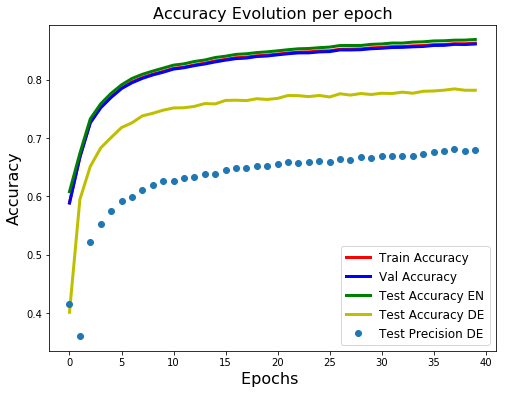

In [135]:
# Accuracy Curves 
plt.figure(figsize=[8,6])
plt.plot(dict_['train_accs'],'r',linewidth=3.0)
plt.plot(dict_['val_accs'],'b',linewidth=3.0)
plt.plot(dict_['test_accs_en'],'g',linewidth=3.0)
plt.plot(dict_['test_accs_de'],'y',linewidth=3.0)
plt.plot(dict_['test_precisions_de'],'o',linewidth=3.0)
plt.legend(['Train Accuracy', 'Val Accuracy',
            'Test Accuracy EN', 'Test Accuracy DE',
            'Test Precision DE'],fontsize=12, loc =4)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Evolution per epoch',fontsize=16)

### Confusion Matrix for English Test:

Confusion matrix, without normalization
[[69438  3346  1942  3332]
 [ 1488 11673   717  1082]
 [ 2128  1466 29877   197]
 [ 3209  1926   208 28857]]


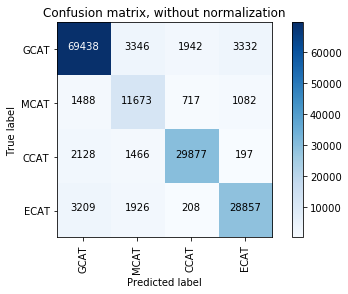

In [136]:
cnf_matrix = confusion_matrix(list(dict_['y_test_pred_en'][39]),list(dict_['y_test_trg_en'][39]))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

Normalized confusion matrix
[[ 0.89  0.04  0.02  0.04]
 [ 0.1   0.78  0.05  0.07]
 [ 0.06  0.04  0.89  0.01]
 [ 0.09  0.06  0.01  0.84]]


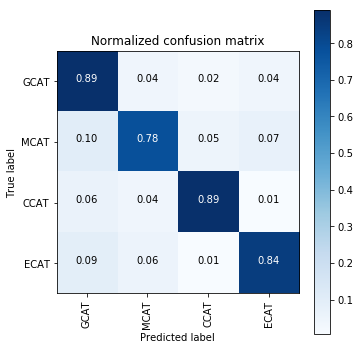

In [137]:
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.savefig("Confusion Matrix")
plt.show()

### Confusion Matrix for German Test:

Confusion matrix, without normalization
[[ 232   83   89  130]
 [ 551 1757  247  216]
 [ 326  837 6627  112]
 [ 332  426  111 3806]]


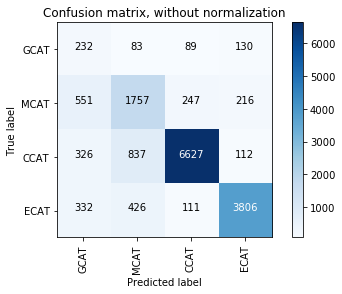

In [138]:
cnf_matrix = confusion_matrix(list(dict_['y_test_pred_de'][39]),list(dict_['y_test_trg_de'][39]))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

Normalized confusion matrix
[[ 0.43  0.16  0.17  0.24]
 [ 0.2   0.63  0.09  0.08]
 [ 0.04  0.11  0.84  0.01]
 [ 0.07  0.09  0.02  0.81]]


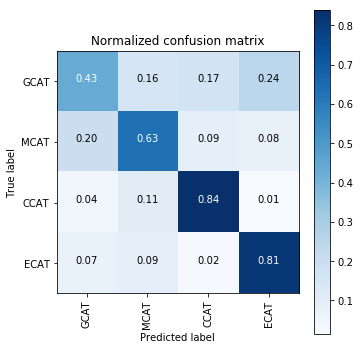

In [139]:
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.savefig("Confusion Matrix")
plt.show()

### Directions for Future Work ???